In [2]:
from BorderModel import IncrementalModel
from BorderQuery import select_features, select_mungedata_simple, select_mungedata
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

In [3]:
def model_xing(xing, munger_id, train_start, train_end, test_start, test_end, actuals):
    df_train = select_mungedata(munger_id, xing, train_start, train_end)
    X_test = select_features(test_start, test_end)
   
    model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, max_features='sqrt', max_depth=20)
    grid = GridSearchCV(model, {})
    im = IncrementalModel(df_train, grid, categoricals=['event'])
    im.predict(X_test)   
    im.score(actuals)
    
    return im

def model_plot(model, start, end, actuals):
    plt.figure(figsize=(16,4))
    baseline = model.baseline()
    ensemble = model.ensemble(actuals, baseline)
    yhat = model.y_predict
    
    plt.plot(actuals[(actuals.index.date>=start) & (actuals.index.date<end)], label='actuals')
    plt.plot(baseline[(baseline.index.date>=start) & (baseline.index.date<end)], label='baseline')
    plt.plot(yhat[(yhat.index.date>=start) & (yhat.index.date<end)], label='predictions')
    plt.plot(ensemble[(ensemble.index.date>=start) & (ensemble.index.date<end)], label='ensemble')
    plt.legend();

In [14]:
munger_id = 3
train_start = '2013-1-1'
train_end = '2015-1-1'
test_start = '2015-1-1'
test_end = '2016-1-1'
model = {}
actuals = {}

for xing in [5, 16, 20]:
    actuals[xing] = select_mungedata_simple(munger_id, xing, test_start, test_end)
    actuals[xing] = actuals[xing].waittime
    model[xing] = model_xing(xing, munger_id, train_start, train_end, test_start, test_end, actuals[xing])

Weights:  1.13787665584 0.864175473914
Weights:  1.2744227246 0.72620989095
Weights:  1.35935875942 0.690058783837


In [15]:
for xing in [5, 16, 20]:
    print xing
    print model[xing].score(actuals[xing])

5
Weights:  1.13787665584 0.864175473914
{'model': 0.31066275811334332, 'ensemble': 0.40703044441678138, 'baseline': 0.23074703434185284}
16
Weights:  1.2744227246 0.72620989095
{'model': -0.13938496042518134, 'ensemble': -0.047755401934545638, 'baseline': -0.47527592569072796}
20
Weights:  1.35935875942 0.690058783837
{'model': -0.066363084797195215, 'ensemble': -0.012874854242180156, 'baseline': -0.34245904514096592}


Weights:  1.13787665584 0.864175473914


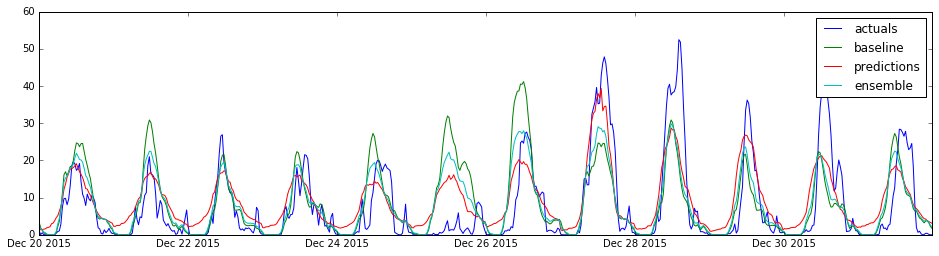

In [18]:
model_plot(model[5], dt.date(2015, 12, 20), dt.date(2016, 1, 2), actuals[5])

Weights:  1.2744227246 0.72620989095


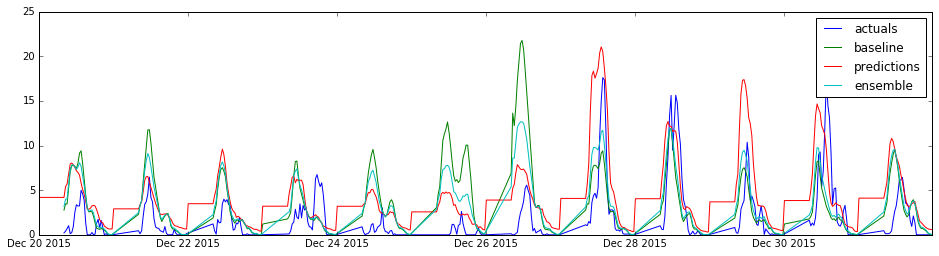

In [20]:
model_plot(model[16], dt.date(2015, 12, 20), dt.date(2016, 1, 2), actuals[16])

### Lynden daily closures are correctly modeled.  

Weights:  1.35935875942 0.690058783837


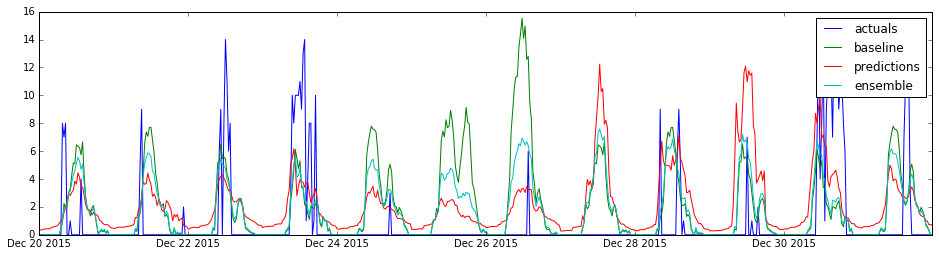

In [21]:
model_plot(model[20], dt.date(2015, 12, 20), dt.date(2016, 1, 2), actuals[20])

In [24]:
actuals_sumas = actuals[20]
actuals_sumas[actuals_sumas.index > '2015-12-24']

date
2015-12-24 00:30:00     0
2015-12-24 01:00:00     0
2015-12-24 01:30:00     0
2015-12-24 02:00:00     0
2015-12-24 02:30:00     0
2015-12-24 03:00:00     0
2015-12-24 03:30:00     0
2015-12-24 04:00:00     0
2015-12-24 04:30:00     0
2015-12-24 05:00:00     0
2015-12-24 05:30:00     0
2015-12-24 06:00:00     0
2015-12-24 06:30:00     0
2015-12-24 07:00:00     0
2015-12-24 07:30:00     0
2015-12-24 08:00:00     0
2015-12-24 08:30:00     0
2015-12-24 09:00:00     0
2015-12-24 09:30:00     0
2015-12-24 10:00:00     0
2015-12-24 10:30:00     0
2015-12-24 11:00:00     0
2015-12-24 11:30:00     0
2015-12-24 12:00:00     0
2015-12-24 12:30:00     0
2015-12-24 13:00:00     0
2015-12-24 13:30:00     0
2015-12-24 14:00:00     0
2015-12-24 14:30:00     0
2015-12-24 15:00:00     0
                       ..
2015-12-31 09:00:00     0
2015-12-31 09:30:00     0
2015-12-31 10:00:00     0
2015-12-31 10:30:00     0
2015-12-31 11:00:00     0
2015-12-31 11:30:00     0
2015-12-31 12:00:00     0
2015-12

### Sumas data has false zeros - not reliable for predictions

## Compare predictions by year

In [4]:
import os
from ipyparallel import Client
rc = Client()
dview = rc[:]

# print(dview.apply_sync(os.getcwd))
# dview.map(os.chdir, ['/home/ubuntu/BorderCrossing/code'] * 32)

with dview.sync_imports():
    import datetime
    from BorderModel import IncrementalModel
    from BorderQuery import select_features, select_mungedata_simple, select_mungedata
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.grid_search import GridSearchCV

importing datetime on engine(s)
importing IncrementalModel from BorderModel on engine(s)
importing select_features,select_mungedata_simple,select_mungedata from BorderQuery on engine(s)
importing ExtraTreesRegressor from sklearn.ensemble on engine(s)
importing GridSearchCV from sklearn.grid_search on engine(s)


In [93]:
munger_id = 3
actuals = {1: {}, 5: {}, 16: {}}
prlist = {1: {}, 5: {}, 16: {}}
cpu = 0

## Pacific Highway by year

In [94]:
xing = 5
for year in [2011, 2012, 2013, 2014, 2015]:
    train_start = datetime.date(year - 2, 1, 1).strftime('%Y-%m-%d')
    train_end = datetime.date(year, 1, 1).strftime('%Y-%m-%d')
    test_start = datetime.date(year, 1, 1).strftime('%Y-%m-%d')
    test_end = datetime.date(year + 1, 1, 1).strftime('%Y-%m-%d')

    actuals[xing][year] = select_mungedata_simple(munger_id, xing, test_start, test_end)
    actuals[xing][year] = actuals[xing][year].waittime
    prlist[xing][year] = rc[cpu].apply_async(model_xing, xing, munger_id, train_start, train_end, test_start, 
                                             test_end, actuals[xing][year])
    
    cpu += 1

In [99]:
prlist[5][2015].ready()

True

In [91]:
prlist[5]

{2011: <AsyncResult: finished>,
 2012: <AsyncResult: finished>,
 2013: <AsyncResult: finished>,
 2014: <AsyncResult: finished>,
 2015: <AsyncResult: finished>}

In [100]:
model5 = {}
for year in [2011, 2012, 2013, 2014, 2015]:
    model5[year] = prlist[5][year].get(1)

In [110]:
for year in [2011, 2012, 2013, 2014, 2015]:
    print year
    print model5[year].score(actuals[5][year])

2011
Weights:  0.38347631384 1.38157612823
{'model': 0.41186749143436352, 'ensemble': 0.47618604756498384, 'baseline': 0.50830951929768831}
2012
Weights:  0.136885492781 1.34223110494
{'model': 0.47762684201445638, 'ensemble': 0.51650843961788229, 'baseline': 0.6264414468772701}
2013
Weights:  0.052887622315 1.69369431495
{'model': 0.39334934783245279, 'ensemble': 0.41670615606797545, 'baseline': 0.57215536973016168}
2014
Weights:  0.966618708964 1.48193535124
{'model': 0.49748367887172651, 'ensemble': 0.5833138934020512, 'baseline': 0.51290499913254095}
2015
Weights:  1.15999615729 0.843347184516
{'model': 0.32587612080781503, 'ensemble': 0.41205812816778731, 'baseline': 0.23074703434185284}


## Peace Arch by year

In [95]:
xing = 1
for year in [2011, 2012, 2013, 2014, 2015]:
    train_start = datetime.date(year - 2, 1, 1).strftime('%Y-%m-%d')
    train_end = datetime.date(year, 1, 1).strftime('%Y-%m-%d')
    test_start = datetime.date(year, 1, 1).strftime('%Y-%m-%d')
    test_end = datetime.date(year + 1, 1, 1).strftime('%Y-%m-%d')

    actuals[xing][year] = select_mungedata_simple(munger_id, xing, test_start, test_end)
    actuals[xing][year] = actuals[xing][year].waittime
    prlist[xing][year] = rc[cpu].apply_async(model_xing, xing, munger_id, train_start, train_end, test_start, 
                                             test_end, actuals[xing][year])
    
    cpu += 1

In [105]:
prlist[1][2011].ready()

True

In [126]:
prlist[1][2012].get(1)

RemoteError: ValueError(Number of features of the model must  match the input. Model n_features is 217 and  input n_features is 220 )

In [127]:
model1 = {}
for year in [2013, 2014, 2015]:
    model1[year] = prlist[1][year].get(1)

In [128]:
for year in [2013, 2014, 2015]:
    print year
    print model1[year].score(actuals[1][year])

2013
Weights:  0.0694421036555 1.6373483885
{'model': 0.40248273786412325, 'ensemble': 0.43158479347296974, 'baseline': 0.61360307915900703}
2014
Weights:  0.438702176718 1.24481271432
{'model': 0.49823621860791056, 'ensemble': 0.56140036749041355, 'baseline': 0.56996406060235849}
2015
Weights:  1.40772556028 0.854951588903
{'model': 0.24350430117639199, 'ensemble': 0.30790178554233183, 'baseline': 0.1059067680212642}


## Lynden by year

In [121]:
xing = 16
for year in [2013, 2014, 2015]:
    train_start = datetime.date(year - 2, 1, 1).strftime('%Y-%m-%d')
    train_end = datetime.date(year, 1, 1).strftime('%Y-%m-%d')
    test_start = datetime.date(year, 1, 1).strftime('%Y-%m-%d')
    test_end = datetime.date(year + 1, 1, 1).strftime('%Y-%m-%d')

    actuals[xing][year] = select_mungedata_simple(munger_id, xing, test_start, test_end)
    actuals[xing][year] = actuals[xing][year].waittime
    prlist[xing][year] = rc[cpu].apply_async(model_xing, xing, munger_id, train_start, train_end, test_start, 
                                             test_end, actuals[xing][year])
    
    cpu += 1

In [67]:
prlist[16][2013].ready()

False

In [114]:
model16 = {}
for year in [2015]:
    model16[year] = prlist[16][year].get(1)

In [115]:
for year in [2015]:
    print year
    print model16[year].score(actuals[16][year])

2015
Weights:  1.27220438901 0.727926856239
{'model': -0.1387455128466788, 'ensemble': -0.055775857472401213, 'baseline': -0.47527592569072796}
